In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
plt.style.use('bmh')
import warnings
warnings.filterwarnings('ignore')

In [2]:
shelter = pd.read_csv('animal_shelter.csv', index_col=0, 
                      parse_dates = ['DateTime_intake','DateTime_outcome'],
                      usecols = ['Animal ID', 'DateTime_intake', 'Intake_Type', 'IntakeCondition',
                                 'Animal_Type_intake', 'Age', 'Breed_intake', 'Color_intake', 'DateTime_outcome', 
                                 'Outcome_Type','Outcome_Subtype', 'Sex_upon_Outcome', 'Age_upon_Outcome', 
                                 'gender_intake', 'fixed_intake', 'fixed_outcome','fixed_changed', 'Age_Bucket'])
shelter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76977 entries, A730601 to A746072
Data columns (total 17 columns):
DateTime_intake       76977 non-null datetime64[ns]
Intake_Type           76977 non-null object
IntakeCondition       76977 non-null object
Animal_Type_intake    76977 non-null object
Age                   76977 non-null object
Breed_intake          76977 non-null object
Color_intake          76977 non-null object
DateTime_outcome      76977 non-null datetime64[ns]
Outcome_Type          76970 non-null object
Outcome_Subtype       31723 non-null object
Sex_upon_Outcome      76973 non-null object
Age_upon_Outcome      76956 non-null object
gender_intake         71369 non-null object
fixed_intake          76976 non-null object
fixed_outcome         76973 non-null object
fixed_changed         76977 non-null int64
Age_Bucket            76977 non-null object
dtypes: datetime64[ns](2), int64(1), object(14)
memory usage: 10.6+ MB


In [3]:
shelter.head()

,DateTime_intake,Intake_Type,IntakeCondition,Animal_Type_intake,Age,Breed_intake,Color_intake,DateTime_outcome,Outcome_Type,Outcome_Subtype,Sex_upon_Outcome,Age_upon_Outcome,gender_intake,fixed_intake,fixed_outcome,fixed_changed,Age_Bucket
Animal ID,,,,,,,,,,,,,,,,,
A730601,2016-07-07 12:11:00,Stray,Normal,Cat,7 months,Domestic Shorthair Mix,Blue Tabby,2016-07-08 09:00:00,Transfer,SCRP,Neutered Male,7 months,Male,Intact,Neutered,1,7-12 months
A683644,2014-07-13 11:02:00,Owner Surrender,Nursing,Dog,4 weeks,Border Collie Mix,Brown/White,2014-11-06 10:06:00,Adoption,Foster,Spayed Female,4 months,Female,Intact,Spayed,1,1-6 weeks
A676515,2014-04-11 08:45:00,Stray,Normal,Dog,2 months,Pit Bull Mix,White/Brown,2014-04-14 18:38:00,Return to Owner,NaN,Neutered Male,3 months,Male,Intact,Neutered,1,1-6 months
A742953,2017-01-31 13:30:00,Stray,Normal,Dog,2 years,Saluki,Sable/Cream,2017-02-04 14:17:00,Transfer,Partner,Intact Male,2 years,Male,Intact,Intact,0,1-3 years
A679549,2014-05-22 15:43:00,Stray,Normal,Cat,1 month,Domestic Shorthair Mix,Black/White,2014-06-16 13:54:00,Transfer,Partner,Neutered Male,2 months,Male,Intact,Neutered,1,1-6 months


In [5]:
cat_dog = shelter[(shelter['Animal_Type_intake'] == 'Cat') | (shelter['Animal_Type_intake'] == 'Dog')]

def outcome(x):
    favorable = ['Adoption', 'Return to Owner']
    unfavorable = ['Euthanasia', 'Died']
    if x in favorable:
        return 'favorable'
    elif x in unfavorable:
        return 'unfavorable'
    else:
        return 'unknown'
    
cat_dog['Outcome'] = cat_dog['Outcome_Type'].apply(outcome)
cat_dog.head()

,DateTime_intake,Intake_Type,IntakeCondition,Animal_Type_intake,Age,Breed_intake,Color_intake,DateTime_outcome,Outcome_Type,Outcome_Subtype,Sex_upon_Outcome,Age_upon_Outcome,gender_intake,fixed_intake,fixed_outcome,fixed_changed,Age_Bucket,Outcome
Animal ID,,,,,,,,,,,,,,,,,,
A730601,2016-07-07 12:11:00,Stray,Normal,Cat,7 months,Domestic Shorthair Mix,Blue Tabby,2016-07-08 09:00:00,Transfer,SCRP,Neutered Male,7 months,Male,Intact,Neutered,1,7-12 months,unknown
A683644,2014-07-13 11:02:00,Owner Surrender,Nursing,Dog,4 weeks,Border Collie Mix,Brown/White,2014-11-06 10:06:00,Adoption,Foster,Spayed Female,4 months,Female,Intact,Spayed,1,1-6 weeks,favorable
A676515,2014-04-11 08:45:00,Stray,Normal,Dog,2 months,Pit Bull Mix,White/Brown,2014-04-14 18:38:00,Return to Owner,NaN,Neutered Male,3 months,Male,Intact,Neutered,1,1-6 months,favorable
A742953,2017-01-31 13:30:00,Stray,Normal,Dog,2 years,Saluki,Sable/Cream,2017-02-04 14:17:00,Transfer,Partner,Intact Male,2 years,Male,Intact,Intact,0,1-3 years,unknown
A679549,2014-05-22 15:43:00,Stray,Normal,Cat,1 month,Domestic Shorthair Mix,Black/White,2014-06-16 13:54:00,Transfer,Partner,Neutered Male,2 months,Male,Intact,Neutered,1,1-6 months,unknown


# Lineplot intake

In [99]:
cat_dog['year'] = cat_dog['DateTime_intake'].dt.year
cat_dog['month'] = cat_dog['DateTime_intake'].dt.month
count_intake = cat_dog['DateTime_intake'].groupby([cat_dog['year'],cat_dog['month'],cat_dog['Animal_Type_intake']]).agg({'count'}).reset_index()
count_intake['Period'] = pd.to_datetime(count_intake[['year', 'month']].assign(day=1))
count_intake = count_intake[:-2] # Last month is incomplete
count_intake.tail()

,year,month,Animal_Type_intake,count,Period
79,2017,1,Dog,1111,2017-01-01
80,2017,2,Cat,278,2017-02-01
81,2017,2,Dog,1111,2017-02-01
82,2017,3,Cat,300,2017-03-01
83,2017,3,Dog,978,2017-03-01


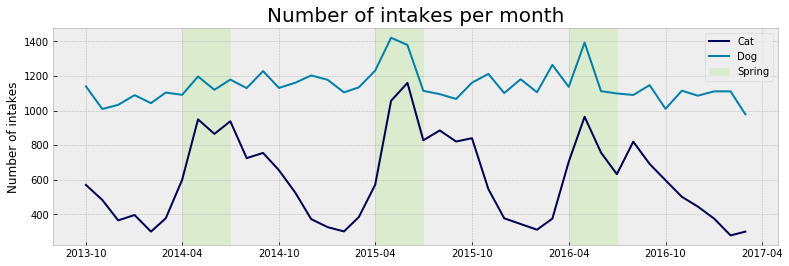

In [105]:
fig, ax = plt.subplots(figsize=(13, 4))
sns.lineplot(x='Period', y='count', hue='Animal_Type_intake', data=count_intake, ax=ax, palette='ocean')

# Spans
ax.axvspan('2015-04-01', '2015-07-01', color='#c8e9af', alpha=0.5, label="Spring")
ax.axvspan('2014-04-01', '2014-07-01', color='#c8e9af', alpha=0.5)
ax.axvspan('2016-04-01', '2016-07-01', color='#c8e9af', alpha=0.5)

# Title, labels and legend
ax.set_title('Number of intakes per month', fontsize=20) # Subplot titles
plt.xlabel('')
plt.ylabel('Number of intakes')

# Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles = handles[1:], labels = labels[1:])

plt.savefig('shelter1.png');

# Lineplot outcome

In [101]:
cat_dog['year'] = cat_dog['DateTime_outcome'].dt.year
cat_dog['month'] = cat_dog['DateTime_outcome'].dt.month
count_out = cat_dog['DateTime_outcome'].groupby([cat_dog['year'],cat_dog['month'],cat_dog['Animal_Type_intake'],cat_dog['Outcome']]).agg({'count'}).reset_index()
count_out['Period'] = pd.to_datetime(count_out[['year', 'month']].assign(day=1))
count_out = count_out[count_out['Outcome'] == 'favorable']
count_out = count_out[:-2] # Last month is incomplete
count_out.tail()

,year,month,Animal_Type_intake,Outcome,count,Period
237,2017,1,Dog,favorable,1008,2017-01-01
240,2017,2,Cat,favorable,227,2017-02-01
243,2017,2,Dog,favorable,997,2017-02-01
246,2017,3,Cat,favorable,167,2017-03-01
249,2017,3,Dog,favorable,851,2017-03-01


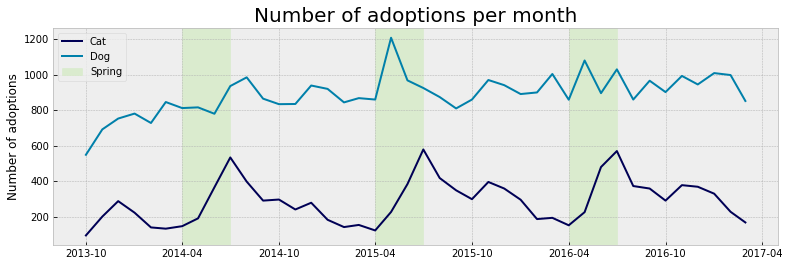

In [106]:
fig, ax = plt.subplots(figsize=(13, 4))
sns.lineplot(x='Period', y='count', hue='Animal_Type_intake', data=count_out, ax=ax, palette='ocean')

# Spans
ax.axvspan('2015-04-01', '2015-07-01', color='#c8e9af', alpha=0.5, label="Spring")
ax.axvspan('2014-04-01', '2014-07-01', color='#c8e9af', alpha=0.5)
ax.axvspan('2016-04-01', '2016-07-01', color='#c8e9af', alpha=0.5)

# Title, labels and legend
ax.set_title('Number of adoptions per month', fontsize=20) # Subplot titles
plt.xlabel('')
plt.ylabel('Number of adoptions')

# Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles = handles[1:], labels = labels[1:])

plt.savefig('shelter2.png');

# Scatterplot

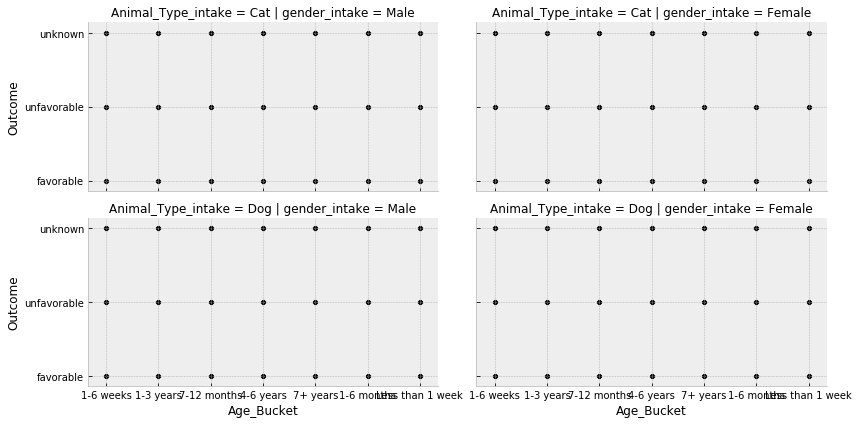

In [7]:
g = sns.FacetGrid(cat_dog, col="gender_intake", row="Animal_Type_intake", aspect=2) # specify groupings
g = g.map(sns.scatterplot, 'Age_Bucket', 'Outcome', color='black')

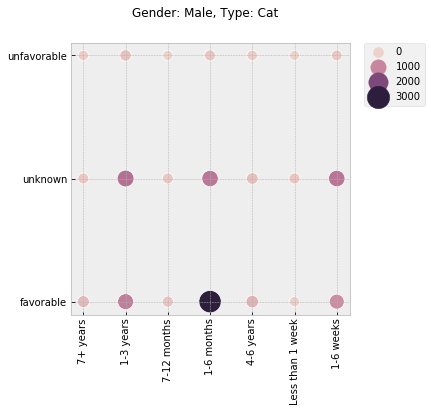

In [144]:
# Retrieve counts
ages = cat_dog.loc[(cat_dog['gender_intake'] == 'Male') & (cat_dog['Animal_Type_intake'] == 'Cat'),'Age_Bucket']
outcomes = cat_dog.loc[(cat_dog['gender_intake'] == 'Male') & (cat_dog['Animal_Type_intake'] == 'Cat'),'Outcome']
points=list(set(zip(ages,outcomes)))
count=[len([age for age,outcome in zip(ages,outcomes) if age==p[0] and outcome==p[1]]) for p in points]
count=np.array(count)

# Plot
fig, ax = plt.subplots(figsize=(5, 5))
plot_age=[i[0] for i in points]
plot_outcome=[i[1] for i in points]
sns.scatterplot(x=plot_age, y=plot_outcome, hue=count, size=count, sizes=(100,500), ax=ax);

# Aesthetics
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.suptitle('Gender: Male, Type: Cat'); # Subplot titles

In [82]:
groups = cat_dog.groupby([cat_dog['gender_intake'],cat_dog['Animal_Type_intake']])
for i, group in enumerate(groups):
    print(i) # group index
    print(group[0][0]) #groupby-value 1
    print(group[0][1]) #groupby-value 2
    #print(group[1])   #group

0
Female
Cat
1
Female
Dog
2
Male
Cat
3
Male
Dog


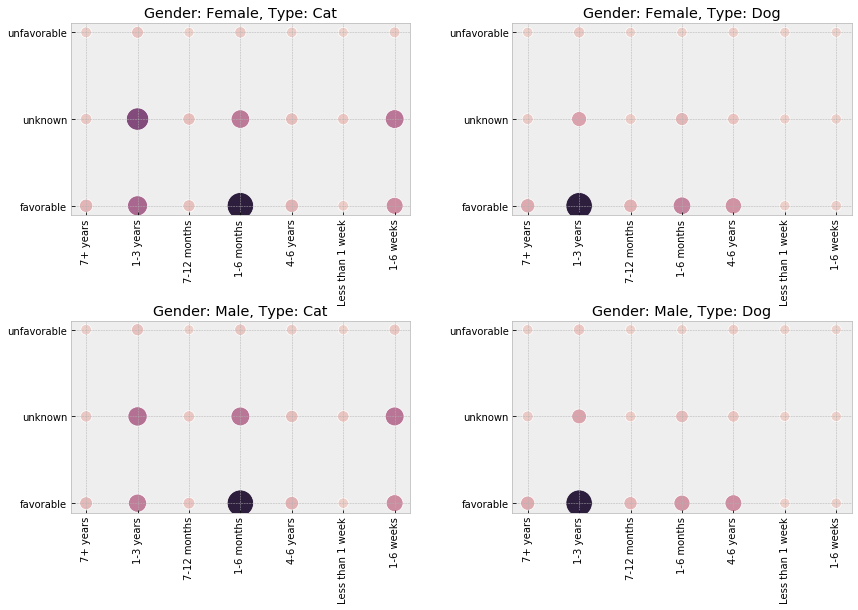

In [113]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 9))
#fig.suptitle('Chances of being adopted', fontsize=30)
plt.subplots_adjust(hspace=0.55,wspace=0.3)

for i, group in enumerate(groups):
    ax = fig.axes[i]
    
    # Retrieve counts
    gender = group[0][0]
    animal_type = group[0][1]
    ages = cat_dog.loc[(cat_dog['gender_intake'] == gender) & (cat_dog['Animal_Type_intake'] == animal_type),'Age_Bucket']
    outcomes = cat_dog.loc[(cat_dog['gender_intake'] == gender) & (cat_dog['Animal_Type_intake'] == animal_type),'Outcome']
    points=list(set(zip(ages,outcomes)))
    count=[len([age for age,outcome in zip(ages,outcomes) if age==p[0] and outcome==p[1]]) for p in points]
    count=np.array(count)

    # Plot
    plot_age=[i[0] for i in points]
    plot_outcome=[i[1] for i in points]
    sns.scatterplot(x=plot_age, y=plot_outcome, hue=count, size=count, sizes=(100,700), legend=False, ax=ax)
 
    #ax.set_xticklabels(rotation=90)
    ax.set_title(f'Gender: {gender}, Type: {animal_type}') # Subplot titles
    for tick in ax.get_xticklabels(): 
        tick.set(rotation=90)
        
plt.savefig('shelter3.png');

# Improved scatterplot

In [160]:
dict_age = {
    'blob':0,
    'Less than 1 week':1,
    '1-6 weeks':2,
    '1-6 months':3,
    '7-12 months':4,
    '1-3 years':5,
    '4-6 years':6,
    '7+ years':7
}
dict_outcome = {
    'blob':0,
    'unfavorable':1,
    'unknown':2,
    'favorable':3,
}
cat_dog["Age_Bucket_int"] = cat_dog["Age_Bucket"].replace(dict_age)
cat_dog["Outcome_int"] = cat_dog["Outcome"].replace(dict_outcome)
cat_dog.head()

,DateTime_intake,Intake_Type,IntakeCondition,Animal_Type_intake,Age,Breed_intake,Color_intake,DateTime_outcome,Outcome_Type,Outcome_Subtype,...,gender_intake,fixed_intake,fixed_outcome,fixed_changed,Age_Bucket,Outcome,year,month,Age_Bucket_int,Outcome_int
Animal ID,,,,,,,,,,,,,,,,,,,,,
A730601,2016-07-07 12:11:00,Stray,Normal,Cat,7-12 months,Domestic Shorthair Mix,Blue Tabby,2016-07-08 09:00:00,Transfer,SCRP,...,Male,Intact,Neutered,1,7-12 months,unknown,2016,7,4,2
A683644,2014-07-13 11:02:00,Owner Surrender,Nursing,Dog,1-6 weeks,Border Collie Mix,Brown/White,2014-11-06 10:06:00,Adoption,Foster,...,Female,Intact,Spayed,1,1-6 weeks,favorable,2014,11,2,3
A676515,2014-04-11 08:45:00,Stray,Normal,Dog,1-6 months,Pit Bull Mix,White/Brown,2014-04-14 18:38:00,Return to Owner,NaN,...,Male,Intact,Neutered,1,1-6 months,favorable,2014,4,3,3
A742953,2017-01-31 13:30:00,Stray,Normal,Dog,1-3 years,Saluki,Sable/Cream,2017-02-04 14:17:00,Transfer,Partner,...,Male,Intact,Intact,0,1-3 years,unknown,2017,2,5,2
A679549,2014-05-22 15:43:00,Stray,Normal,Cat,1-6 months,Domestic Shorthair Mix,Black/White,2014-06-16 13:54:00,Transfer,Partner,...,Male,Intact,Neutered,1,1-6 months,unknown,2014,6,3,2


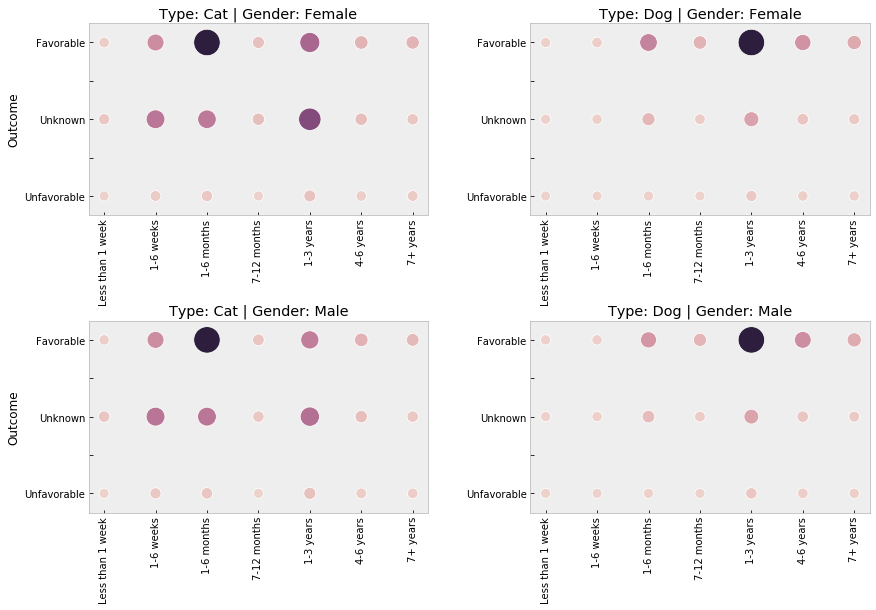

In [167]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 9))
#fig.suptitle('Chances of being adopted', fontsize=30)
plt.subplots_adjust(hspace=0.55,wspace=0.3)

for i, group in enumerate(groups):
    ax = fig.axes[i]
    
    # Retrieve counts
    gender = group[0][0]
    animal_type = group[0][1]
    ages = cat_dog.loc[(cat_dog['gender_intake'] == gender) & (cat_dog['Animal_Type_intake'] == animal_type),'Age_Bucket_int']
    outcomes = cat_dog.loc[(cat_dog['gender_intake'] == gender) & (cat_dog['Animal_Type_intake'] == animal_type),'Outcome_int']
    points=list(set(zip(ages,outcomes)))
    count=[len([age for age,outcome in zip(ages,outcomes) if age==p[0] and outcome==p[1]]) for p in points]
    count=np.array(count)

    # Plot
    plot_age=[i[0] for i in points]
    plot_outcome=[i[1] for i in points]
    sns.scatterplot(x=plot_age, y=plot_outcome, hue=count, size=count, sizes=(100,700), legend=False, ax=ax)
 
    # Aesthetics
    ax.set_title(f'Type: {animal_type} | Gender: {gender}') # Subplot titles
    for tick in ax.get_xticklabels(): 
        tick.set(rotation=90)
    ax.set_xticklabels(list(dict_age.keys()))
    ax.set_yticklabels(['','Unfavorable','','Unknown','','Favorable'])
    ax.set_ylim(0.75,3.25)
    ax.grid(False)
        
fig.axes[0].set_ylabel('Outcome')
fig.axes[2].set_ylabel('Outcome')
        
plt.savefig('shelter4.png');